## Titanic problem With Machine learning

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
url='C:\\Users\\vsiripuram\\Desktop\\python\\titanic'
test_file_path= os.path.join(url,'test.csv')
train_file_path= os.path.join(url,'train.csv')

In [3]:
train_df=pd.read_csv(train_file_path,index_col='PassengerId')
test_df=pd.read_csv(test_file_path,index_col='PassengerId')

In [4]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
type(train_df)

pandas.core.frame.DataFrame

### Basic structure

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
test_df['Survived']=-888

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
Survived    418 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [10]:
df=pd.concat((test_df,train_df),axis=0,sort='True')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [12]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
892,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,3,male,0,-888,330911
893,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,3,female,1,-888,363272
894,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,2,male,0,-888,240276
895,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,3,male,0,-888,315154
896,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,3,female,1,-888,3101298


In [13]:
df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
887,27.0,NaN,S,13.00,"Montvila, Rev. Juozas",0,2,male,0,0,211536
888,19.0,B42,S,30.00,"Graham, Miss. Margaret Edith",0,1,female,0,1,112053
889,NaN,NaN,S,23.45,"Johnston, Miss. Catherine Helen ""Carrie""",2,3,female,1,0,W./C. 6607
890,26.0,C148,C,30.00,"Behr, Mr. Karl Howell",0,1,male,0,1,111369
891,32.0,NaN,Q,7.75,"Dooley, Mr. Patrick",0,3,male,0,0,370376


In [14]:
df.Name

PassengerId
892                                     Kelly, Mr. James
893                     Wilkes, Mrs. James (Ellen Needs)
894                            Myles, Mr. Thomas Francis
895                                     Wirz, Mr. Albert
896         Hirvonen, Mrs. Alexander (Helga E Lindqvist)
897                           Svensson, Mr. Johan Cervin
898                                 Connolly, Miss. Kate
899                         Caldwell, Mr. Albert Francis
900            Abrahim, Mrs. Joseph (Sophie Halaut Easu)
901                              Davies, Mr. John Samuel
902                                     Ilieff, Mr. Ylio
903                           Jones, Mr. Charles Cresson
904        Snyder, Mrs. John Pillsbury (Nelle Stevenson)
905                                 Howard, Mr. Benjamin
906    Chaffee, Mrs. Herbert Fuller (Carrie Constance...
907        del Carlo, Mrs. Sebastiano (Argenia Genovesi)
908                                    Keane, Mr. Daniel
909                

In [15]:
df[['Name','Age']]

,Name,Age
PassengerId,,
892,"Kelly, Mr. James",34.5
893,"Wilkes, Mrs. James (Ellen Needs)",47.0
894,"Myles, Mr. Thomas Francis",62.0
895,"Wirz, Mr. Albert",27.0
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0
897,"Svensson, Mr. Johan Cervin",14.0
898,"Connolly, Miss. Kate",30.0
899,"Caldwell, Mr. Albert Francis",26.0
900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.0


In [16]:
df.loc[5:10]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female,1,1,237736


In [17]:
df.iloc[5:10,3:5]

,Fare,Name
PassengerId,,
897,9.2250,"Svensson, Mr. Johan Cervin"
898,7.6292,"Connolly, Miss. Kate"
899,29.0000,"Caldwell, Mr. Albert Francis"
900,7.2292,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)"
901,24.1500,"Davies, Mr. John Samuel"


In [18]:
df.loc[5:10,'Age':'Parch']

,Age,Cabin,Embarked,Fare,Name,Parch
PassengerId,,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0


In [19]:
df.loc[5:10,['Age','Nmae','Pclass']]

C:\Users\vsiripuram\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Age,Nmae,Pclass
PassengerId,,,
5,35.0,NaN,3
6,NaN,NaN,3
7,54.0,NaN,1
8,2.0,NaN,3
9,27.0,NaN,3
10,14.0,NaN,2


In [20]:
male_passengers=df.loc[df.Sex=='male',:]
print('The number of male passangers :{0}'.format(len(male_passengers)))

The number of male passangers :843


In [21]:
class_passengers=df.loc[(df.Sex=='male') & (df.Pclass==1),:]
print("the number male passengers in the first class :{0}".format(len(class_passengers)))

the number male passengers in the first class :179


### Summary Statistics
Numarical Features

In [23]:
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [26]:
print('Mean Fare : {0}'.format(df.Fare.mean()))
print('Median Fare :{0}'.format(df.Fare.median()))

Mean Fare : 33.295479281345585
Median Fare :14.4542


In [30]:
print('Min Fare :{0}'.format(df.Fare.min()))
print('Max Fare :{0}'.format(df.Fare.max()))
print('Fare Range : {0}'.format(df.Fare.max()-df.Fare.min()))
print('25th percentails:{0}'.format(df.Fare.quantile(.25)))
print('50th percentails :{0}'.format(df.Fare.quantile(.5)))
print('75th percentails :{0}'.format(df.Fare.quantile(.75)))
print('Varance of Fare is :{0}'.format(df.Fare.var()))
print('Standard Deviation Fare:{0}'.format(df.Fare.std()))

Min Fare :0.0
Max Fare :512.3292
Fare Range : 512.3292
25th percentails:7.8958
50th percentails :14.4542
75th percentails :31.275
Varance of Fare is :2678.959737892895
Standard Deviation Fare:51.758668239174156


In [41]:
%matplotlib inline

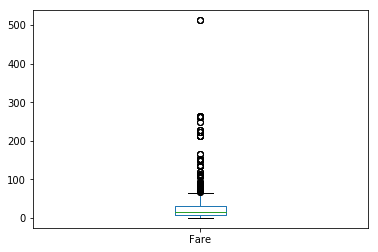

In [42]:
df.Fare.plot(kind='box')

Catagorical Features
Counts and Proportions

In [45]:
df.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-283.301757,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,414.337413,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-888.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-888.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [49]:
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [52]:
df[df.Survived!=-888].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [55]:
df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [57]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

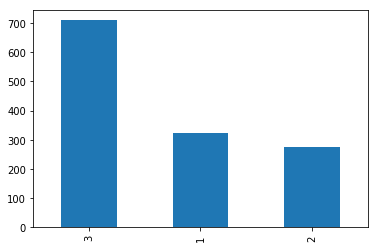

In [60]:
df.Pclass.value_counts().plot(kind='bar')

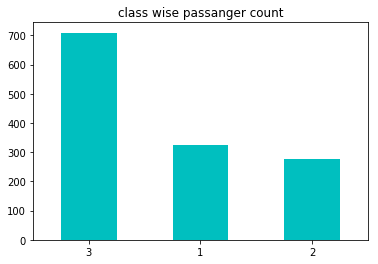

In [62]:
df.Pclass.value_counts().plot(kind='bar',rot=0,title='class wise passanger count',color='c')

In [65]:
%%HTML
<Style type="text\css">
table.dataframe td,table.dataframe th {
    
    border-style : solid;
}

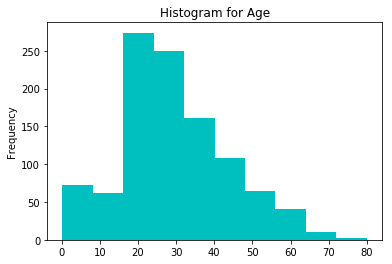

In [67]:
df.Age.plot(kind='hist',title='Histogram for Age',color='c')

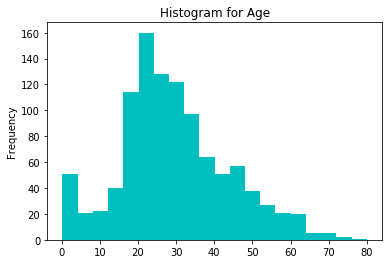

In [75]:
df.Age.plot(kind='hist',title='Histogram for Age',color='c',bins=20)

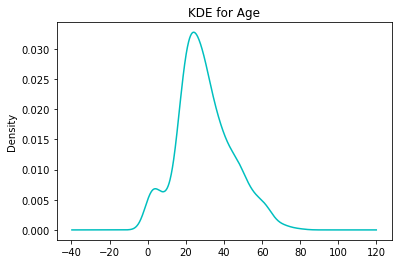

In [79]:
df.Age.plot(kind='kde',title='KDE for Age',color='c')

In [82]:
print('the skewness for age :{0}'.format(df.Age.skew()))
print('The skewness of Fare :{0}'.format(df.Fare.skew()))

the skewness for age :0.40767455974362266
The skewness of Fare :4.367709134122921


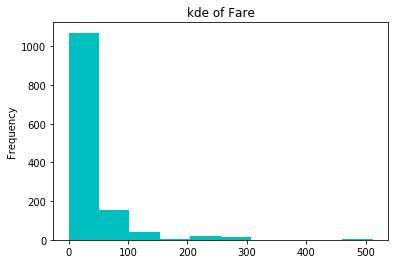

In [87]:
df.Fare.plot(kind='hist',title='kde of Fare',color='c')

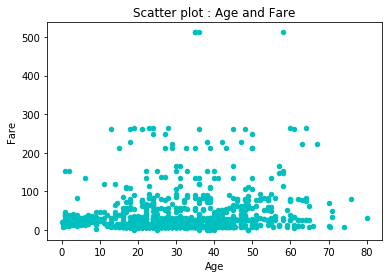

In [89]:
df.plot.scatter(x='Age',y='Fare',color='c',title='Scatter plot : Age and Fare')

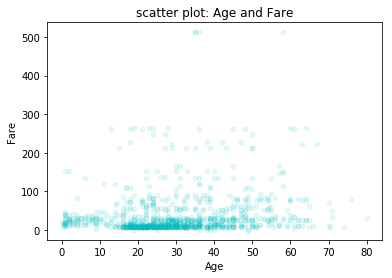

In [95]:
df.plot.scatter(x='Age',y='Fare',color='c',title='scatter plot: Age and Fare',alpha=0.1)

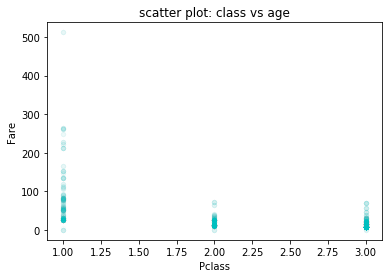

In [105]:
df.plot.scatter(x='Pclass',y='Fare',color='c',title='scatter plot: class vs age',alpha=0.025)

### Grouping and Aggregation 

In [111]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [115]:
df.groupby('Pclass').Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [118]:
df.groupby('Pclass')['Fare','Age'].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [120]:
df.groupby('Pclass').agg({'Fare': 'mean','Age':'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [122]:
Aggregation = {
    
    'Fare':{
        'mean-fare':'mean',
        'median-fare':'median',
        'max-fare':max,
        'min-fare':min
        },
    'Age':{
        'mean-Age':'mean',
        'median-Age':'median',
        'age range':lambda x:max(x)-min(x)
            }
}

In [125]:
df.groupby('Pclass').agg(Aggregation)

Fare                                       Age             \
        mean-fare median-fare  max-fare min-fare   mean-Age median-Age   
Pclass                                                                   
1       87.508992     60.0000  512.3292      0.0  39.159930       39.0   
2       21.179196     15.0458   73.5000      0.0  29.506705       29.0   
3       13.302889      8.0500   69.5500      0.0  24.816367       24.0   

                  
       age range  
Pclass            
1          79.08  
2          69.33  
3          73.83

In [127]:
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

### crosstab

In [131]:
pd.crosstab(df.Pclass,df.Sex)

Sex,female,male
Pclass,,
1,144,179
2,106,171
3,216,493


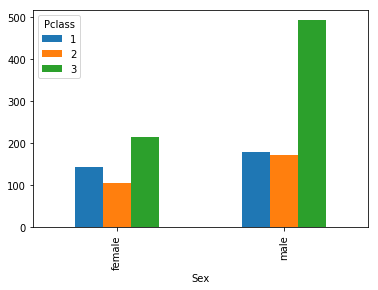

In [134]:
pd.crosstab(df.Sex,df.Pclass).plot(kind='bar')

### pivot table

In [138]:
df.pivot_table(index='Sex',columns='Pclass',values='Age',aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [140]:
df.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [142]:
df.groupby(['Sex','Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


## Data Mungging

Common Activites (Data Quality issues)

1) common issues in the data need to fix with appropriate ways

2) Encounting the Missing Values --- inappropriate information 

3) Extreme values (outliers) -- mean, median ,std,var will be impart because of this extreme values

4) Erroneous values -- miss leading values which are also give the most impect

  #### issue
- inaccurate analysis
- Modeling won't work in many cases
 #### solution
- Deletion (if you have very less values) but it's not correct way bcz deleting data means loosing the information
- imputation ( imputation is noting but replacing some missing values with sutable values)
 
 ##### Imputation techenics
 
 - Mean imputation (calcuate the mean value and replace with missing vlaues) but if you have extream values it's not a good         solution
 - Meadian imputation (calcuate the meadian value and replace with missing vlaues) 
 - Mode imputation ( if you are dealing with categorical value will go for mode imputation ) replace with hight frequence
    values
 - more complex techinic for replacing missing values
 - Forward / Backward Fill (fill with previous value or next available value)
 - Predictive Models (we can also use predictive models to replace the missing values)
 
 

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [148]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [150]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [151]:
pd.crosstab(df[df.Survived !=-888].Survived,df[df.Survived!=-888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [153]:
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [155]:
# by using the above result most poassible Embarked value is C
# so let's replace the vlaues
df.Embarked.fillna('c',inplace=True)

In [158]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [160]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [171]:
median_fare=df.loc[(df.Pclass== 3) & (df.Embarked=='S'),'Fare'].median()
print(median_fare)

8.05


In [172]:
df.Fare.fillna(median_fare,inplace=True)

In [175]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
